In [3]:
import pandas as pd 
from matplotlib import pyplot as plt
import math

N = 7 # Size of window for N-day rolling std

df = pd.read_csv("../WTI.csv", index_col="Date", parse_dates=True)


In [4]:
clouds = pd.read_csv("../combined.csv", parse_dates=True, index_col=0)

start = max(pd.to_datetime(clouds.index.min()), df.index.min())
end = min(pd.to_datetime(clouds.index.max()), df.index.max())
print("Start: ", df.loc[start].name)
print("End: ", df.loc[end].name)
df = df[start:end]


Start:  2016-01-05 00:00:00
End:  2024-04-05 00:00:00


In [5]:
# rolling standard deviation of price
# df['v'] = df['Price'].rolling(N).std() ** 2
df['v'] = df['Price'].rolling(N).std()


0.09323933136067382
0.21009638992266308


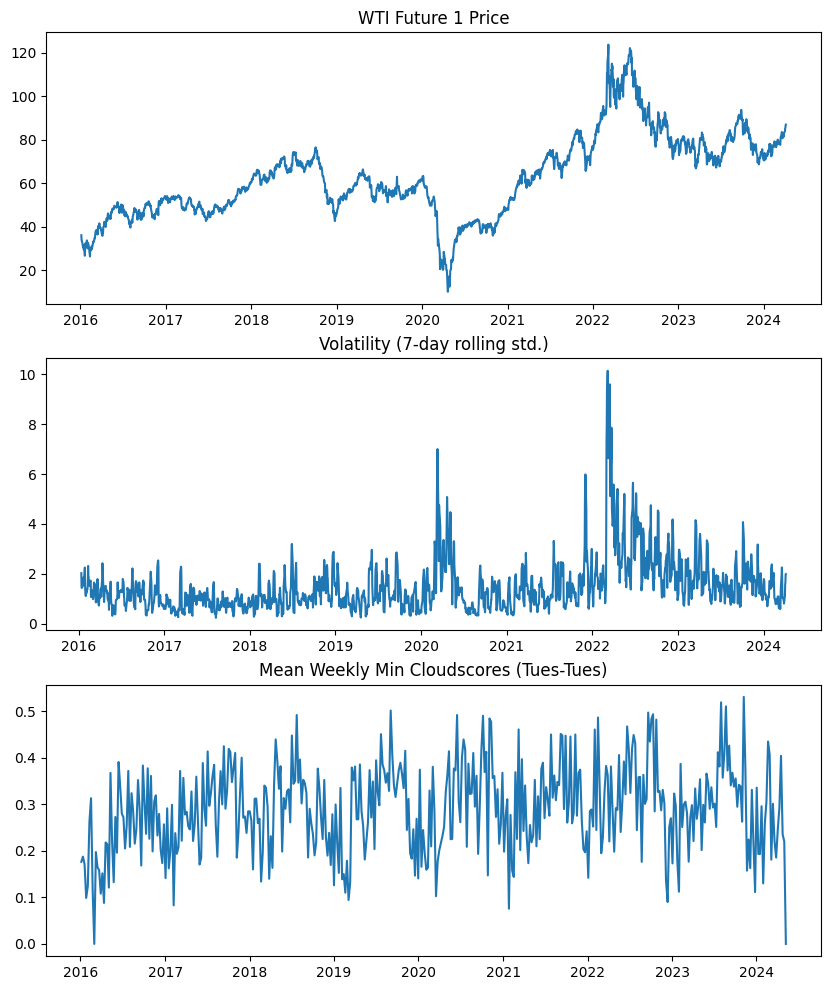

In [6]:
fig, axs = plt.subplots(3, figsize=(10, 12))
axs[0].plot(df['Price'])
axs[0].set_title("WTI Future 1 Price")
axs[1].plot(df['v'])
axs[1].set_title(f"Volatility ({N}-day rolling std.)")
axs[2].plot(clouds.mean(axis=1))
axs[2].set_title("Mean Weekly Min Cloudscores (Tues-Tues)")

print(df['v'].corr(clouds.mean(axis=1)))
print(df['Price'].corr(clouds.mean(axis=1)))